##CardioVascular Disease Estimator

##<>importing the necessary libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##<> Path and Data-Preprocessing

In [37]:
#setting path of dataset
path = "/content/drive/MyDrive/aiml sem4/Cardiovascular_Disease_Dataset.csv"
df = pd.read_csv(path)

#Exploration and Preprocessing

print("checking datatype and non-null counts:-\n")
print(df.info(),"\n")

print("\nStatistics summary:-\n")
print(df.describe())

print("\nCount check of missing values in each feature:-\n")
print(df.isnull().sum())

# Excluded patientId
df.drop(columns=["patientid"], inplace=True)

#Feature Transformation
#Note: Since any categorical not present so no need to convert into numeric data

checking datatype and non-null counts:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB
None 


Statistics summary:-

  

##<>Selection of features and labels
##<>Splitting dataset into training and testing sets

In [38]:

x = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Labels

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,train_size=None, random_state=0)

##<>Feature Scalling
###->Normalization
###->Standardisation

In [39]:
# Convert to DataFrame for feature scaling[e.g: Normalization & Standardisation]
train_df = pd.DataFrame(x_train, columns=df.columns[:-1])
test_df = pd.DataFrame(x_test, columns=df.columns[:-1])

# Apply scalling only to selected columns [Note: these features have varying different ranges of values]
scalable = ["age", "restingBP", "serumcholestrol", "maxheartrate", "oldpeak"]
scaler = StandardScaler()
train_df[scalable] = scaler.fit_transform(train_df[scalable])
test_df[scalable] = scaler.transform(test_df[scalable])

# Convert into numpy array for training
x_train = train_df.values
x_test = test_df.values

##<>Distribution graph for each label seperatly for training and testing data

Train set distribution: 
Class 0: 325
Class 1: 475
Test set distribution: 
Class 0: 95
Class 1: 105




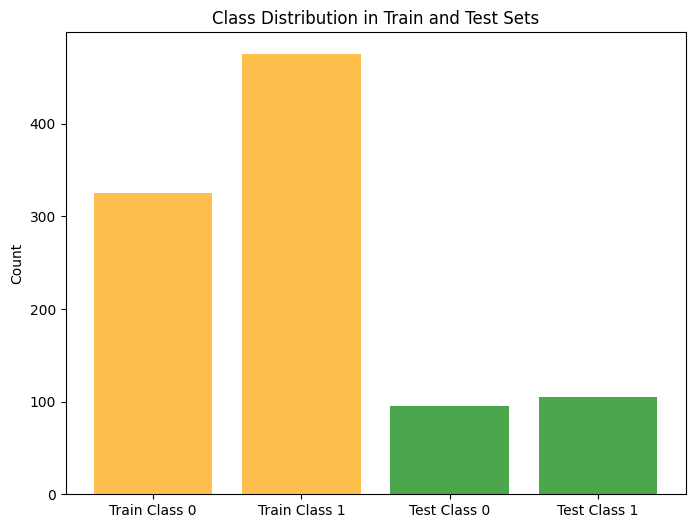

In [40]:
# Check class distribution in train and test sets
print("Train set distribution: ")
train_counts = np.bincount(y_train)
for label, count in enumerate(train_counts):
    print(f"Class {label}: {count}")

print("Test set distribution: ")
test_counts = np.bincount(y_test)
for label, count in enumerate(test_counts):
    print(f"Class {label}: {count}")
print("\n")


#Class distribution plot
plt.figure(figsize=(8, 6))
plt.bar(['Train Class 0', 'Train Class 1'], np.bincount(y_train), color='orange', alpha=0.7)
plt.bar(['Test Class 0', 'Test Class 1'], np.bincount(y_test), color='green', alpha=0.7)
plt.title("Class Distribution in Train and Test Sets")
plt.ylabel("Count")
plt.show()

##<>Random Forest Classifier initialisation
###<>Training and testing the model
###<>Predict the labels based on test results

In [41]:
# Initialization
rfcf = RandomForestClassifier(n_estimators=16, criterion='entropy', random_state=0)

# Train the model
rfcf.fit(x_train, y_train)

# Prediction on test set
y_pred = rfcf.predict(x_test)

##<>Model Evaluation and performance matrices
###->Accuracy
###->Confusion Matrix
###->Classification Report

Accuracy:  98.0 %
Confusion Matrix:
[[ 93   2]
 [  2 103]]




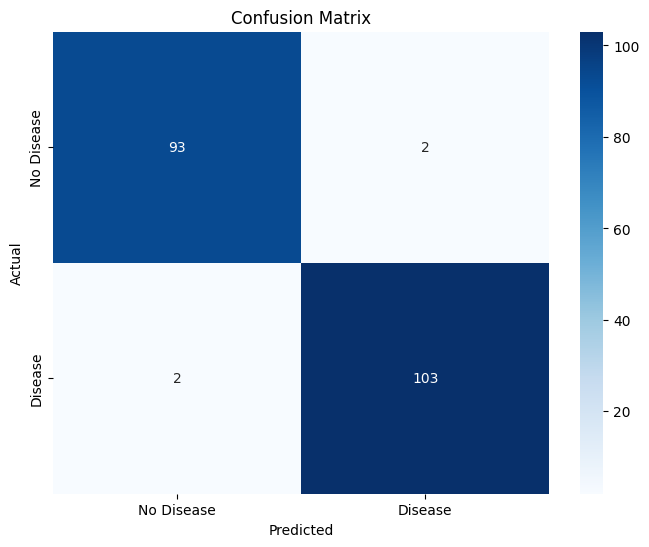



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.98      0.98      0.98       105

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [42]:
# Accuracy
acc=accuracy_score(y_test, y_pred)*100
print(f"Accuracy: ",acc,"%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\n")

# CM Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

##<>Feature Importance
###->Display data
###->Visualisation graph

Feature Importance:
              Feature  Importance
10              slope    0.382439
3           restingBP    0.153762
2           chestpain    0.105736
7        maxheartrate    0.071907
4     serumcholestrol    0.068852
11   noofmajorvessels    0.067647
9             oldpeak    0.046535
6     restingrelectro    0.037591
0                 age    0.025903
1              gender    0.018063
5   fastingbloodsugar    0.016811
8       exerciseangia    0.004755




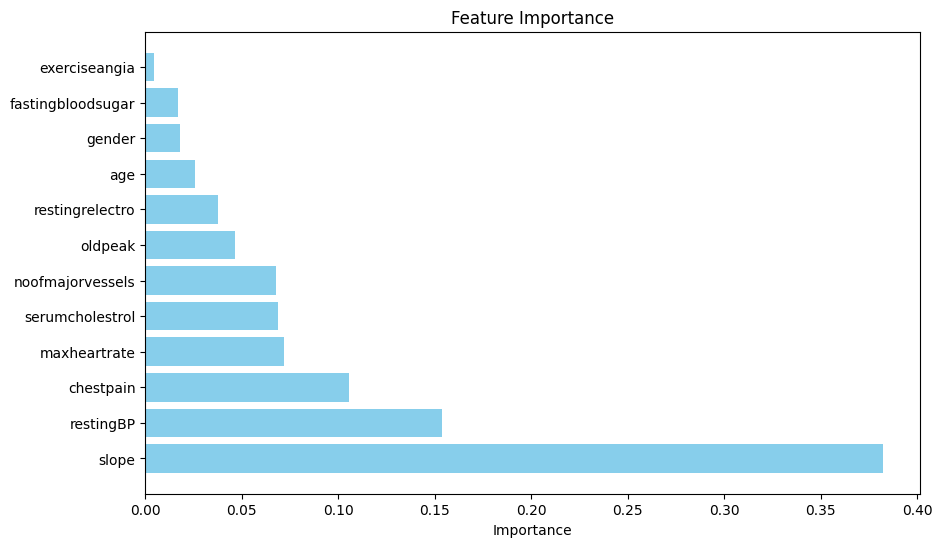

In [43]:
# Feature Importance
feature_importance = rfcf.feature_importances_    #extracts the importance for each feature
feature_df = pd.DataFrame({
    'Feature': df.columns[:-1],
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_df)
print("\n")

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

#<>Hyperparameter Tunning

In [44]:
# Hyperparameter Tuning (using GridSearchCV)
param_grid = {
    'n_estimators': [10, 50, 75, 100],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rfcf, param_grid=param_grid, cv=3)  #initialisation of gridsearchcv with 3 folds cross validation
grid_search.fit(x_train, y_train)                                        #trains on all possible combinatin for parametrs

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Re-train the model with the best parameters
best_rfcf = grid_search.best_estimator_
best_rfcf.fit(x_train, y_train)
print("\n")


Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}




#<>Model evaluation after Hypertunning


Accuracy after tuning:  99.0 %
Confusion Matrix:
[[ 94   1]
 [  1 104]]




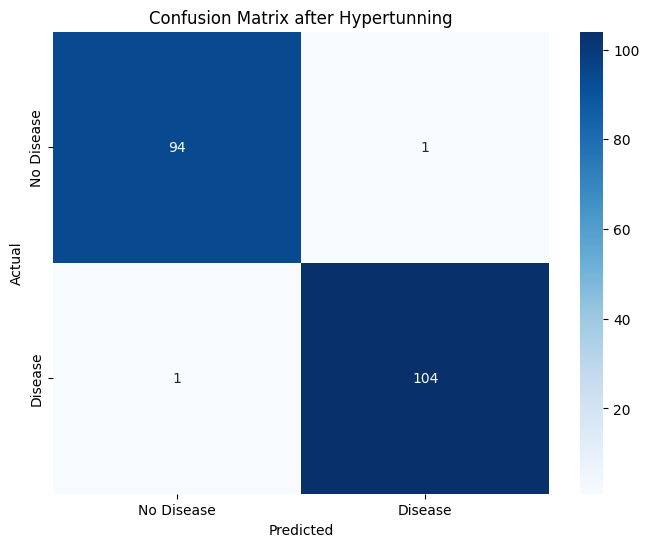



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        95
           1       0.99      0.99      0.99       105

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [45]:
# Evaluate the model after tuning
y_pred_best = best_rfcf.predict(x_test)
accAfter=accuracy_score(y_test, y_pred_best)
print(f"Accuracy after tuning: ",accAfter*100,"%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:")
print(cm)
print("\n")

# CM Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix after Hypertunning")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_best))